In [1]:
# Import the libraries

In [2]:
import pandas as pd

In [3]:
# importing the dataset

In [4]:
data = pd.read_csv('heart.csv')

In [5]:
# Taking care of missing values

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Take care of duplicate values

In [8]:
data_dup = data.duplicated().any()
data_dup

True

In [9]:
data = data.drop_duplicates()

In [10]:
data_dup = data.duplicated().any()
data_dup

False

In [11]:
# Data processing

In [12]:
cate_val = []
cont_val = []

for x in data.columns:
    if data[x].nunique() <= 10:
        cate_val.append(x)
    else:
        cont_val.append(x)

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
# Encoding categorical data

In [16]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [18]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [20]:
#Feature scaling

In [21]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [24]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [25]:
# Splitting the dataset into training set and test set

In [26]:
X = data.drop('target',axis=1)

In [27]:
y = data['target']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42 )

In [30]:
# Logistic Regression

In [31]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred1 = log.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred1)

0.9016393442622951

In [44]:
# KNeighbors Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
import numpy as np

# Ensure X_test is a NumPy array
X_test = np.array(X_test)

# Check if the array is C-contiguous and convert it if necessary
if not X_test.flags['C_CONTIGUOUS']:
    X_test = np.ascontiguousarray(X_test)

# Proceed with prediction
y_pred2 = knn.predict(X_test)

C:\Users\MKT17\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [51]:
accuracy_score(y_test, y_pred2)

0.8688524590163934

In [55]:
# Non-Linear ML Algorithms

In [56]:
data = pd.read_csv('heart.csv')

In [57]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
data = data.drop_duplicates()

In [59]:
data.shape

(302, 14)

In [61]:
X = data.drop('target',axis=1)
y = data['target']

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
# Decision tree classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier 

In [66]:
dt = DecisionTreeClassifier()

In [67]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
y_pred3=dt.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred3)

0.819672131147541

In [83]:
# Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier()

In [86]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
y_pred4=rf.predict(X_test)

In [88]:
accuracy_score(y_test, y_pred4)

0.8688524590163934

In [76]:
# Grdient Boosting Classifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
gbc = GradientBoostingClassifier()

In [91]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [92]:
y_pred5=gbc.predict(X_test)

In [93]:
accuracy_score(y_test, y_pred5)

0.8524590163934426

In [94]:
final_data = pd.DataFrame({'Models':['LR','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test, y_pred1),
                                accuracy_score(y_test, y_pred2),
                                accuracy_score(y_test, y_pred3),
                                accuracy_score(y_test, y_pred4),
                                accuracy_score(y_test, y_pred5)]})

In [95]:
final_data

,Models,ACC
0,LR,0.901639
1,KNN,0.868852
2,DT,0.819672
3,RF,0.868852
4,GB,0.852459


In [96]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

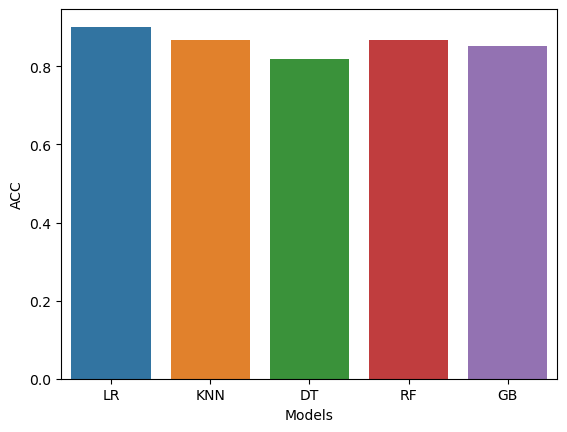

In [97]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [98]:
X = data.drop('target',axis=1)
y = data['target']

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
log = LogisticRegression()
log.fit(X,y)

C:\Users\MKT17\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
# Prediction of new data

In [102]:
import pandas as pd

In [103]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [104]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [106]:
p = log.predict(new_data)
if p[0] == 0:
    print('No Disease')
else:
    print('Disease')

No Disease


In [107]:
# Save model using joblib

In [108]:
import joblib

In [109]:
joblib.dump(log,'model_joblib_heart')

['model_joblib_heart']

In [110]:
model = joblib.load('model_joblib_heart')

In [111]:
model.predict(new_data)

array([0], dtype=int64)